### <center> Functional Analysis III: Programming Assignment </center>

Héctor Andrade Loarca # 375708 

Melf Boeckel # 543098

We have a frame $(\varphi_i)_i\in I$ for a Hilbert space $\mathcal{H}$ with frame bounds $A,B>0$, f a signal in $\mathcal{H}$. We can recover the signal $f$ using the *frame algorithm*, Defining the sequence of signals $(g_j)_{j\in \mathbb{Z}}$, by

$$
g_j=\begin{cases} 
0 & j=0 \\
g_{j-1}+\frac{2}{A+B}S(f-g_{j-1}) & j\neq0.
\end{cases}
$$
Therefore, $\lim_{j\rightarrow \infty} g_j=f$.

- (a) Let $\mathcal{H}=\mathbb{R}^N$, and $\# I=M>N$. Construct a random frame for $\mathbb{R}^N$ with $M$ elements. 

In [1]:
N=6; % Dimension
M=9; % The number of elements
Ts = zeros(N,M); % Synthesis operator T* initialization
% We construct a random matrix centered in zero
while rank(Ts) ~= N
    Ts = (rand(N,M)-0.5)*2;
end;
S=Ts*Ts'; %Frame operator S=(T*)T

Lets calculate the frame bounds A,B>0 for this frame. Using the minimum and maximum eigenvalue of the matrix S.

In [2]:
ls= eig(S);
A=min(ls);
B=max(ls);

In [3]:
A,B

A =

    0.1060


B =

    8.2074


- (b) and (c) Implement the algorithm with such S

In [4]:
% First define our signal as a random signal
f=rand(N,1);

In [5]:
gj=zeros(N,1); % initalize the iterations
rate=[norm(f-gj)/norm(f)];

In [6]:
gj(:,1)

ans =

     0
     0
     0
     0
     0
     0


In [7]:
gj(:,2)=gj(:,1)+(2/(A+B))*(S*(f-gj(:,1)))

gj =

         0    0.0812
         0    0.6355
         0    0.7159
         0    0.1138
         0    0.3458
         0    0.1752


In [8]:
% Lets get the iterations for this function, and calculate the rate of convergence 
gj=zeros(N,1); % initalize the iterations
rate=[norm(f-gj)/norm(f)];
for j=2:70
    % Lets calculate the rate of convergence
    gj(:,j)=gj(:,j-1)+(2/(A+B))*(S*(f-gj(:,j-1)));
    rate(j)=norm(f-gj(:,j))/norm(f);
end

In [9]:
% In the last iterations it gets it stable state and converges quite fast to f
gj(:,50:70), f

ans =

  Columns 1 through 7

    0.0825    0.0830    0.0843    0.0848    0.0861    0.0865    0.0877
    0.5524    0.5531    0.5497    0.5503    0.5471    0.5477    0.5447
    0.9553    0.9530    0.9555    0.9534    0.9557    0.9537    0.9559
    0.3019    0.3063    0.3039    0.3080    0.3057    0.3096    0.3075
    0.5229    0.5258    0.5260    0.5288    0.5290    0.5317    0.5318
    0.2063    0.2034    0.2072    0.2045    0.2081    0.2054    0.2089

  Columns 8 through 14

    0.0881    0.0893    0.0897    0.0908    0.0912    0.0922    0.0926
    0.5452    0.5423    0.5429    0.5401    0.5406    0.5380    0.5385
    0.9540    0.9561    0.9543    0.9563    0.9546    0.9565    0.9548
    0.3112    0.3091    0.3126    0.3107    0.3140    0.3122    0.3154
    0.5344    0.5345    0.5369    0.5371    0.5394    0.5395    0.5417
    0.2064    0.2096    0.2072    0.2103    0.2081    0.2110    0.2089

  Columns 15 through 21

    0.0936    0.0939    0.0949    0.0952    0.0961    0.0964    0.0

Now lets plot the rate of convergence and the function $r(n)=\left(\frac{B-A}{B+A}\right)^j$

In [11]:
r=[1];
for j = 2:70
    r(j)=((B-A)/(B+A))^j;
end

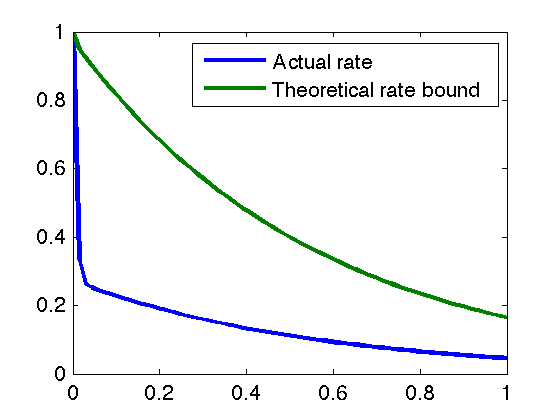

In [16]:
t = linspace(0,1,length(rate'));
clf;
plot(t,[rate',r'],'LineWidth',2);
legend('Actual rate','Theoretical rate bound')